# Principal Component Analysis with Cancer Data

In [160]:
#Import all the necessary modules
#Import all the necessary modules
from matplotlib import pyplot
import seaborn as sn
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [161]:
column=['Sample code','Clump','Cell Size','Cell Shape','Marginal Adhesion','SE cell size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

cancer_df=pd.read_csv('breast-cancer-wisconsin.data.txt',names=column)

cancer_df.head(10)

,Sample code,Clump,Cell Size,Cell Shape,Marginal Adhesion,SE cell size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [162]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [163]:
cancer_df.drop('Sample code',axis=1,inplace=True)
cancer_df.info()
cancer_df.describe()
#cancer_df['Bare Nuclei']=cancer_df['Bare Nuclei'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
Clump                699 non-null int64
Cell Size            699 non-null int64
Cell Shape           699 non-null int64
Marginal Adhesion    699 non-null int64
SE cell size         699 non-null int64
Bare Nuclei          699 non-null object
Bland Chromatin      699 non-null int64
Normal Nucleoli      699 non-null int64
Mitoses              699 non-null int64
Class                699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


,Clump,Cell Size,Cell Shape,Marginal Adhesion,SE cell size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [164]:
# We could see "?" values in column, this should be removed from data set
columns = cancer_df.columns
percent_missing = cancer_df.isnull().sum() * 100 / len( cancer_df)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
missing_value_df

# Check for missing value in any other column

,column_name,percent_missing
Clump,Clump,0.0
Cell Size,Cell Size,0.0
Cell Shape,Cell Shape,0.0
Marginal Adhesion,Marginal Adhesion,0.0
SE cell size,SE cell size,0.0
Bare Nuclei,Bare Nuclei,0.0
Bland Chromatin,Bland Chromatin,0.0
Normal Nucleoli,Normal Nucleoli,0.0
Mitoses,Mitoses,0.0
Class,Class,0.0


In [165]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
cancer_df.replace('?', np.nan, inplace=True)

columns = cancer_df.columns
percent_missing = cancer_df.isna().sum() * 100 / len( cancer_df)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
missing_value_df
# we have 2.288984% of ? being present in the data set.



,column_name,percent_missing
Clump,Clump,0.000000
Cell Size,Cell Size,0.000000
Cell Shape,Cell Shape,0.000000
Marginal Adhesion,Marginal Adhesion,0.000000
SE cell size,SE cell size,0.000000
Bare Nuclei,Bare Nuclei,2.288984
Bland Chromatin,Bland Chromatin,0.000000
Normal Nucleoli,Normal Nucleoli,0.000000
Mitoses,Mitoses,0.000000
Class,Class,0.000000


In [166]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# we can replace them with mean data.
cancer_df['Bare Nuclei']=cancer_df['Bare Nuclei'].astype(float)
cancer_df['Bare Nuclei']=cancer_df['Bare Nuclei'].fillna((cancer_df['Bare Nuclei'].mean()))


# the object type was to be converted into float type and to be imputed with mean 

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


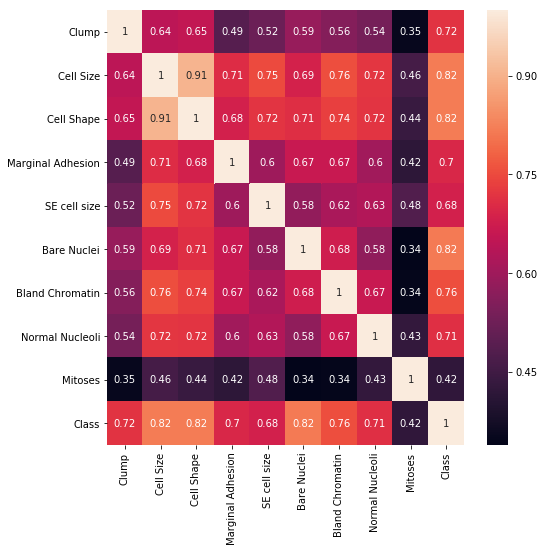

In [167]:
# Check for correlation of variable
#cancer_df.corr()
corrmat = cancer_df.corr()
pyplot.subplots(figsize = (8,8))
sn.heatmap(corrmat, annot=True)

In [168]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

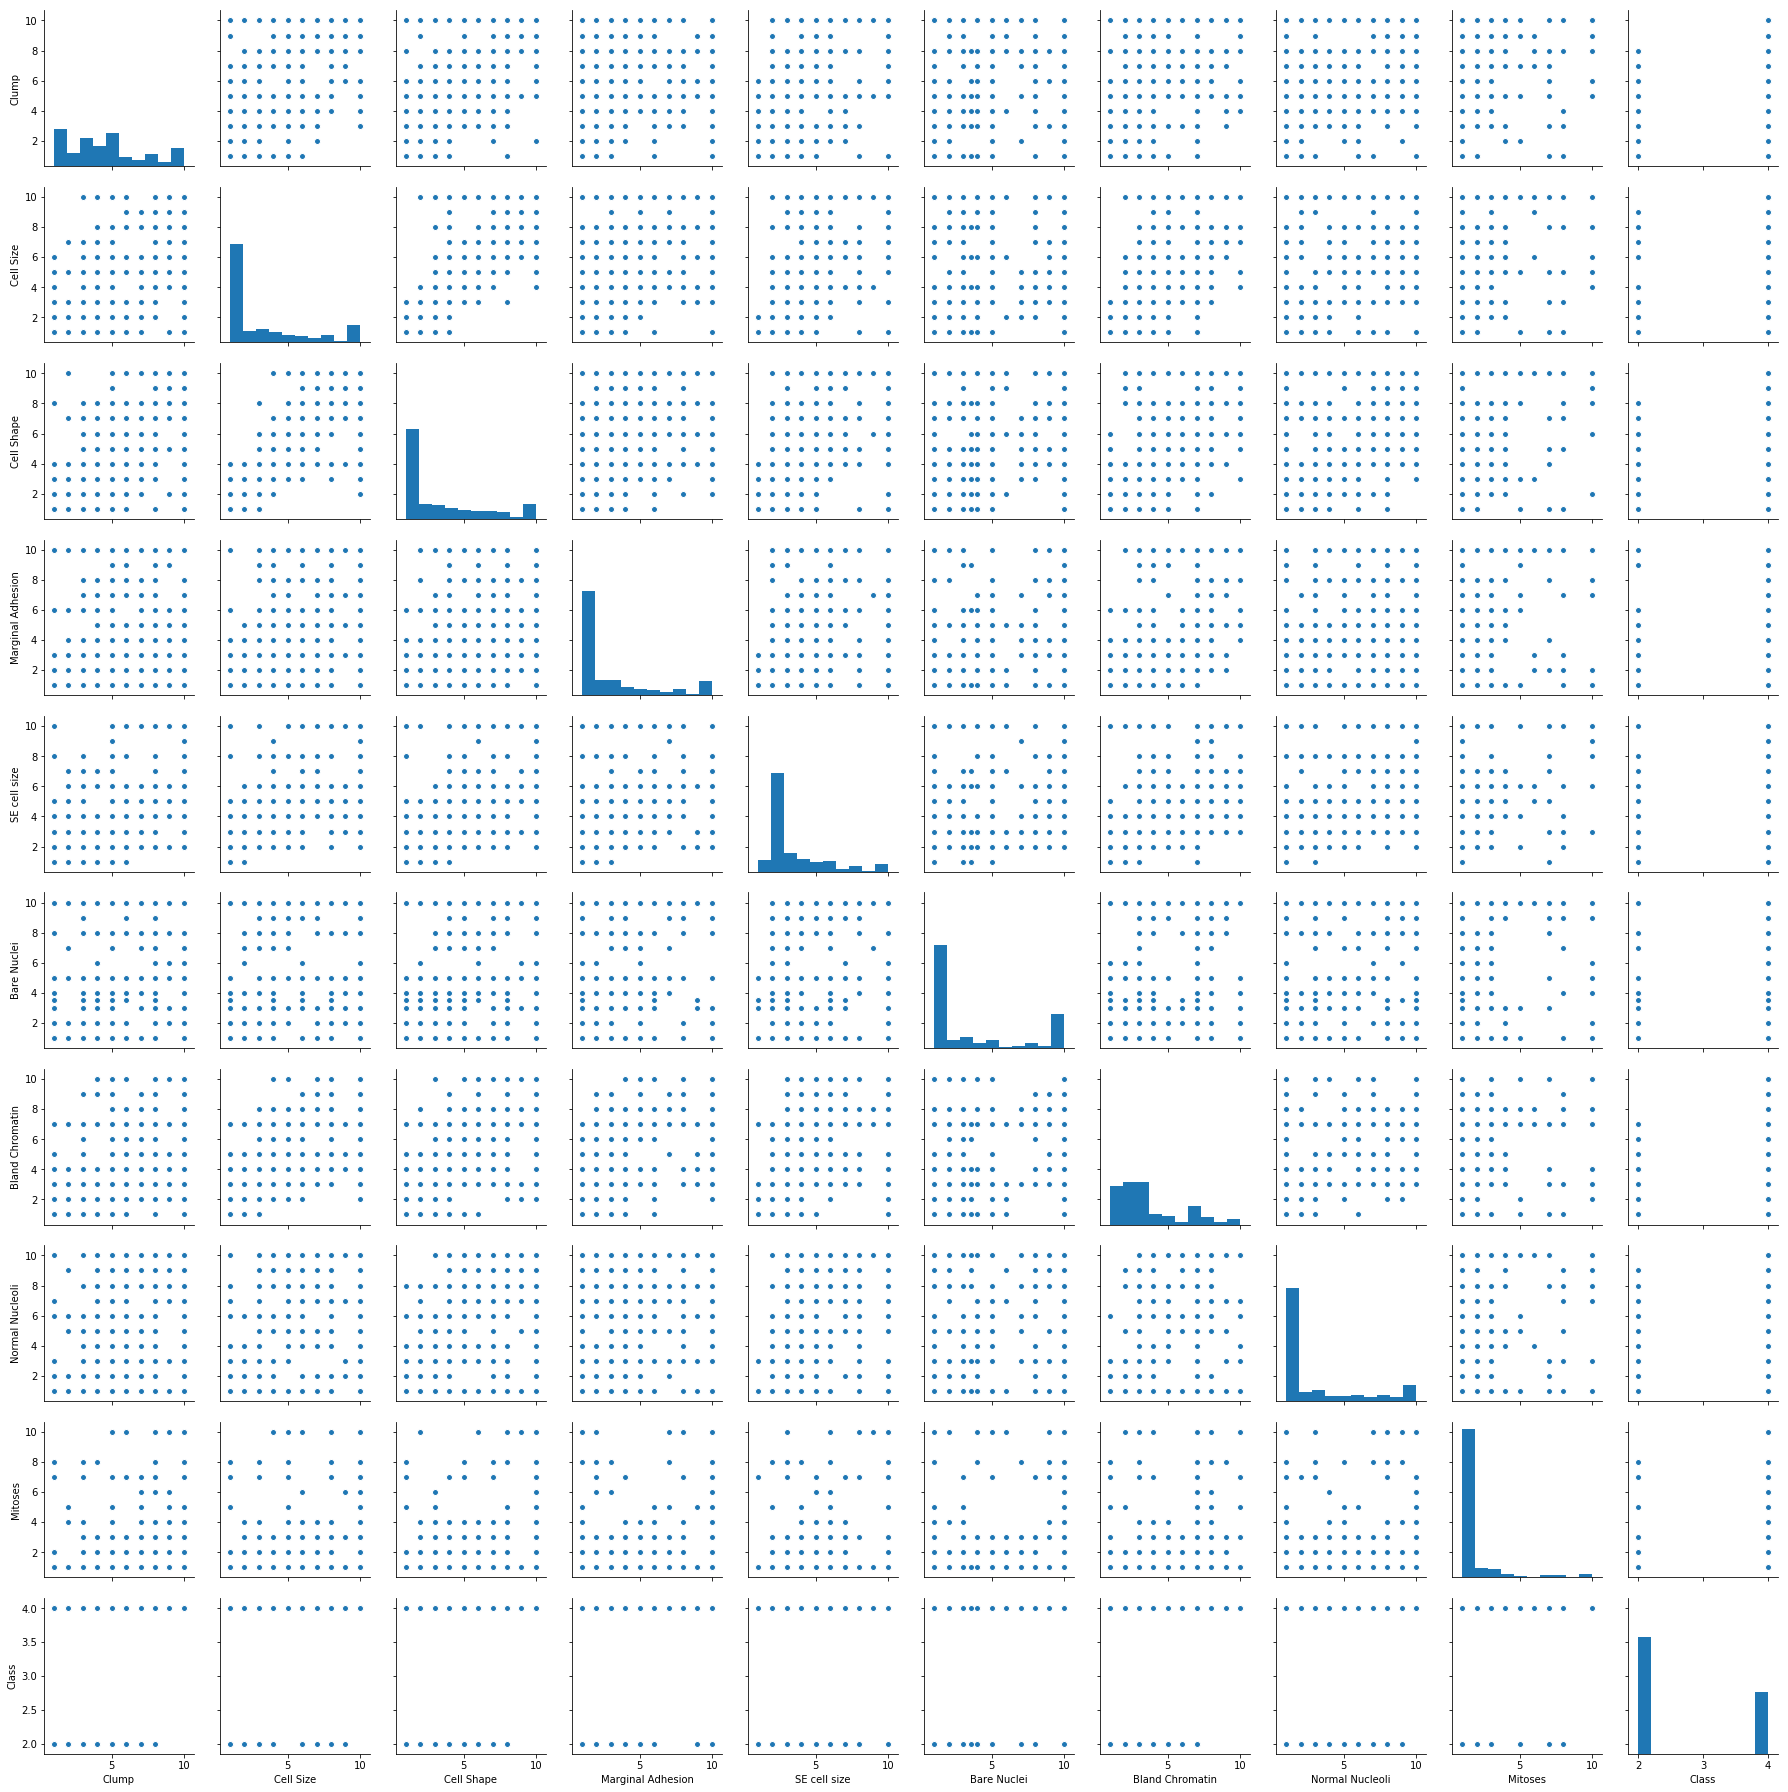

In [169]:
#Let us check for pair plots
sn.pairplot(cancer_df)

In [170]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [171]:
# We could see most of the outliers are now removed.
from pandas.api.types import is_numeric_dtype

def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df

remove_outlier(cancer_df)


,Clump,Cell Size,Cell Shape,Marginal Adhesion,SE cell size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class


# Q6 Create a covariance matrix for identifying Principal components

In [172]:
# PCA
# Step 1 - Create covariance matrix
y = cancer_df["Class"]
X = cancer_df[cancer_df.columns[1:-1]]




In [173]:
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

('Covariance Matrix \n%s', array([[1.00143266, 0.90818117, 0.70659267, 0.75287621, 0.68778539,
        0.75680368, 0.72390044, 0.4593503 ],
       [0.90818117, 1.00143266, 0.68405782, 0.72069948, 0.71062241,
        0.73700282, 0.72047704, 0.43953974],
       [0.70659267, 0.68405782, 1.00143266, 0.60045809, 0.66600196,
        0.66767051, 0.60421681, 0.41823111],
       [0.75287621, 0.72069948, 0.60045809, 1.00143266, 0.58209401,
        0.61698451, 0.62978166, 0.47978787],
       [0.68778539, 0.71062241, 0.66600196, 0.58209401, 1.00143266,
        0.67686392, 0.57818894, 0.33922548],
       [0.75680368, 0.73700282, 0.66767051, 0.61698451, 0.67686392,
        1.00143266, 0.66683179, 0.34466258],
       [0.72390044, 0.72047704, 0.60421681, 0.62978166, 0.57818894,
        0.66683179, 1.00143266, 0.42894941],
       [0.4593503 , 0.43953974, 0.41823111, 0.47978787, 0.33922548,
        0.34466258, 0.42894941, 1.00143266]]))


C:\Users\RB00001\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\RB00001\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Q7 Identify eigen values and eigen vector

In [174]:
# Step 2- Get eigen values and eigen vector

In [175]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

('Eigen Vectors \n%s', array([[-0.39849408, -0.06051227, -0.7348805 , -0.20554236, -0.14045424,
         0.43821578, -0.20809082,  0.01347099],
       [-0.393855  , -0.09259314,  0.66576163, -0.18402014, -0.12457245,
         0.55239545, -0.13143128,  0.14584097],
       [-0.35259832, -0.08331285,  0.04737347,  0.52907553,  0.09398899,
         0.09611349,  0.10014304, -0.74730708],
       [-0.35445886,  0.14523625,  0.06725343, -0.37557788, -0.63122895,
        -0.47323424,  0.18487045, -0.22606605],
       [-0.34696337, -0.26255527, -0.07729821,  0.51688544, -0.1767777 ,
        -0.1197304 ,  0.40735472,  0.57097459],
       [-0.36339801, -0.25442846,  0.05982657,  0.03597759,  0.26171261,
        -0.49465941, -0.68839531,  0.1061363 ],
       [-0.35328985,  0.00434436, -0.01848272, -0.42195116,  0.66812871,
        -0.10299142,  0.48966569,  0.00270616],
       [-0.24260798,  0.90886863,  0.00699956,  0.23749009,  0.10644517,
        -0.0026848 , -0.12497943,  0.17801963]]))
('\n Ei

# Q8 Find variance and cumulative variance by each eigen vector

In [176]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.404370730198824, array([-0.39849408, -0.393855  , -0.35259832, -0.35445886, -0.34696337,
       -0.36339801, -0.35328985, -0.24260798])), (0.7719715343271009, array([-0.06051227, -0.09259314, -0.08331285,  0.14523625, -0.26255527,
       -0.25442846,  0.00434436,  0.90886863])), (0.4646656856047177, array([-0.20554236, -0.18402014,  0.52907553, -0.37557788,  0.51688544,
        0.03597759, -0.42195116,  0.23749009])), (0.3814829700915129, array([-0.14045424, -0.12457245,  0.09398899, -0.63122895, -0.1767777 ,
        0.26171261,  0.66812871,  0.10644517])), (0.3313444076596655, array([ 0.01347099,  0.14584097, -0.74730708, -0.22606605,  0.57097459,
        0.1061363 ,  0.00270616,  0.17801963])), (0.2958086493365481, array([-0.20809082, -0.13143128,  0.10014304,  0.18487045,  0.40735472,
       -0.68839531,  0.48966569, -0.12497943])), (0.27303295411842565, array([ 0.43821578,  0.55239545,  0.09611349, -0.47323424, -0.1197304 ,
       -0.49465941, -0.10299142, -0.0026848 ])), (0.08

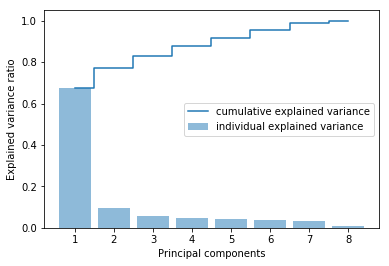

In [177]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  
cum_var_exp = np.cumsum(var_explained)  
plt.bar(range(1,9), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,9),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [178]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2','PC 3','PC 4'])

finalDf = pd.concat([principalDf, cancer_df[["Class"]]], axis = 1)

In [179]:
finalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 5 columns):
PC 1     699 non-null float64
PC 2     699 non-null float64
PC 3     699 non-null float64
PC 4     699 non-null float64
Class    699 non-null int64
dtypes: float64(4), int64(1)
memory usage: 27.4 KB


In [180]:
pca.explained_variance_ratio_

array([0.71306195, 0.08191088, 0.05042505, 0.04831223])

# Q10 Find correlation between components and features

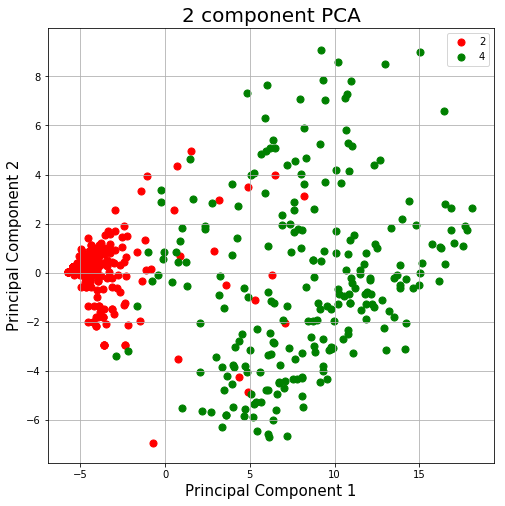

In [181]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [2,4]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

# Q22 Change the column indices from 0 to 99

# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.